In [37]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [3]:
a=torch.tensor([1,2,3,4])

In [4]:
a = torch.tensor([4.0, 1.0, 2.0, 3.0, 4])
a.dtype

torch.float32

In [5]:
a = torch.tensor([4, 1, 2, 3, 4])
b=a.type(torch.float32)
b.dtype

torch.float32

In [6]:
# same as reshape
a.view(-1,1)

tensor([[4],
        [1],
        [2],
        [3],
        [4]])

In [10]:
a = torch.from_numpy(np.array([4, 1, 2, 3, 4]))
b = a.numpy()

In [ ]:
a = torch.from_numpy( df.values)

In [ ]:
a.tolist()
a[0].item()

In [11]:
a=torch.tensor([1,2,3])
a.dtype

torch.int64

In [12]:
u=torch.tensor([1,2])
v=torch.tensor([0,1])
torch.dot(u, v)

tensor(2)

In [13]:
X=torch.tensor([[1,1],[1,3],[3,4]])
X.shape

torch.Size([3, 2])

In [14]:
X = torch.tensor([[1, 0], [0, 1]])
Y = torch.tensor([[2, 1], [1, 2]]) 
X_times_Y = X * Y

In [15]:
X_times_Y

tensor([[2, 0],
        [0, 2]])

## Derivative

In [28]:
x = torch.tensor(3., requires_grad=True)

In [29]:
y = x**2
y

tensor(9., grad_fn=<PowBackward0>)

In [30]:
y.backward()

In [31]:
x.grad

tensor(6.)

In [32]:
z = x**2 + 2*x +1 

In [33]:
z.backward()

In [34]:
x.grad

tensor(14.)

In [ ]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(1., requires_grad=True)
f = u*v + u**2
f.backward()
u.grad()
v.grad()

In [35]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [36]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

In [38]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

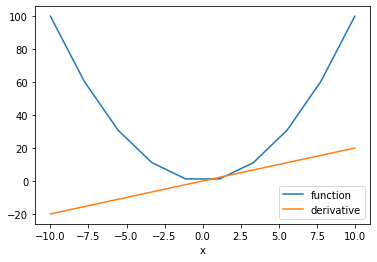

In [39]:
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

## Dataset

In [40]:
from torch.utils.data import Dataset
torch.manual_seed(1)

In [ ]:
## Derive Dataset


class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [4]:
import torch
import torch.nn as nn
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
x = torch.tensor([[1.0]])
yhat = model(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 2x1)

In [5]:
z=torch.arange(-100,100,0.1).view(-1, 1)

In [6]:
sig=nn.Sigmoid ()
yhat=sig(z)

In [7]:
yhat= torch.sigmoid(z)

In [8]:
z = torch.tensor([[2,5,0],[10,8,2],[6,5,1]])

_, yhat = z.max(1)

In [9]:
yhat

tensor([1, 0, 0])

In [10]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

In [11]:
model=Net(1,3,1)

In [12]:
model

Net(
  (linear1): Linear(in_features=1, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=1, bias=True)
)

In [13]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(linear1(x))  
        x=torch.sigmoid(linear2(x))
        return x